<a href="https://colab.research.google.com/github/BriDeWaltCCC/PFDASpring2023FinalProject/blob/main/Class_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/Methane_final.csv')

df.drop(['Unnamed: 0', 'notes'], axis=1, inplace=True)
# df.drop([0], axis=0, inplace=True)
# print(df.dtypes)
# df['emissions'] = df['emissions'].astype('int64')
df

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022
1544,World,World,30296.500000,Energy,Steam coal,All,2022
1545,World,World,133350.984375,Energy,Total,All,2022
1546,World,World,9737.874023,Other,Total,All,2019-2021


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/MockDataForFilteringandFixing.csv')
print(df.dtypes)
print(df.iloc[0, 4])
df

Cases       int64
Country    object
City       object
Date       object
Cost       object
dtype: object
$37,363.43


,Cases,Country,City,Date,Cost
0,3461,Ireland,Levanger,11/19/2023,"$37,363.43"
1,3314,Spain,Logroño,04/15/2022,"$24,284.03"
2,3191,South Africa,Dublin,07/13/2022,"$62,998.77"
3,3427,United States,Tejar,12/01/2023,"$3,421.29"
4,2655,Sweden,Mexico City,08/08/2023,"$20,933.44"
...,...,...,...,...,...
497,3079,Turkey,Cork,04/08/2023,"$42,290.97"
498,2994,France,Schoonaarde,09/30/2023,"$52,017.66"
499,3164,Indonesia,Quảng Ngãi,08/19/2023,"$79,501.28"
500,2724,Colombia,Stjørdalshalsen,09/10/2022,"$67,195.95"


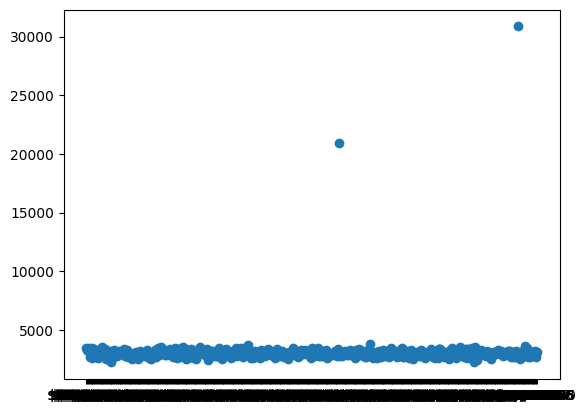

In [4]:
fig, ax = plt.subplots()

ax.scatter(df['Cost'],df['Cases'])

plt.show()

In [5]:
example = '$37,363.43'
example = example[1:]
# example = '37,363.43'
# example = '37363.43'
example = example.replace(',','')
example = float(example)
print(example)

print(example*2)
result = 37363.43

37363.43
74726.86


In [6]:
newvalues = []
for value in df['Cost']:
    value = value[1:]
    value = value.replace(',','')
    value = float(value)
    # newvalues.append(float(value[1:].replace(',','')))
    newvalues.append(value)

df['Cost'] = newvalues
print(df.dtypes)
df

Cases        int64
Country     object
City        object
Date        object
Cost       float64
dtype: object


,Cases,Country,City,Date,Cost
0,3461,Ireland,Levanger,11/19/2023,37363.43
1,3314,Spain,Logroño,04/15/2022,24284.03
2,3191,South Africa,Dublin,07/13/2022,62998.77
3,3427,United States,Tejar,12/01/2023,3421.29
4,2655,Sweden,Mexico City,08/08/2023,20933.44
...,...,...,...,...,...
497,3079,Turkey,Cork,04/08/2023,42290.97
498,2994,France,Schoonaarde,09/30/2023,52017.66
499,3164,Indonesia,Quảng Ngãi,08/19/2023,79501.28
500,2724,Colombia,Stjørdalshalsen,09/10/2022,67195.95


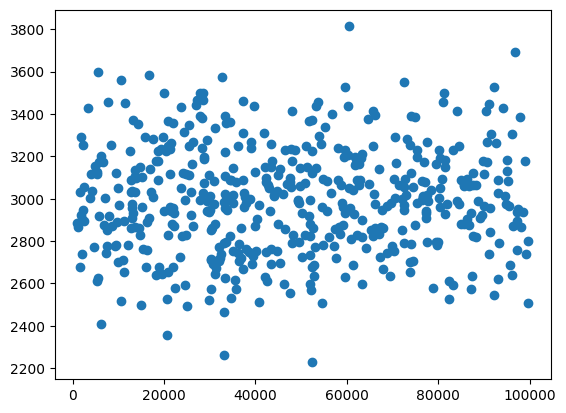

In [20]:
fig, ax = plt.subplots()

dffiltered = df[df['Cases'] < 15000]

ax.scatter(dffiltered['Cost'],dffiltered['Cases'])

plt.show()

In [8]:
newvalues = []
for value in df['Date']:
    day = value[3:5] #mm/dd/yyyy
    month = value[:2]
    year = value[-4:]
    newvalues.append(day+'/'+month+'/'+year)

df['Date'] = newvalues
df

,Cases,Country,City,Date,Cost
0,3461,Ireland,Levanger,19/11/2023,37363.43
1,3314,Spain,Logroño,15/04/2022,24284.03
2,3191,South Africa,Dublin,13/07/2022,62998.77
3,3427,United States,Tejar,01/12/2023,3421.29
4,2655,Sweden,Mexico City,08/08/2023,20933.44
...,...,...,...,...,...
497,3079,Turkey,Cork,08/04/2023,42290.97
498,2994,France,Schoonaarde,30/09/2023,52017.66
499,3164,Indonesia,Quảng Ngãi,19/08/2023,79501.28
500,2724,Colombia,Stjørdalshalsen,10/09/2022,67195.95


In [16]:
dfUSA = df[df['Country'] == 'United States']
dfhighcases = df[df['Cases'] > 3000]
dfhighcases = dfhighcases[dfhighcases['Cases'] < 3200]

dfUSA

,Cases,Country,City,Date,Cost
3,3427,United States,Tejar,01/12/2023,3421.29
64,2737,United States,Mielec,30/07/2022,39327.36
117,3065,United States,Marawi,09/12/2022,88284.94
292,2889,United States,Donetsk,15/02/2023,16177.47
358,2574,United States,Paya Lebar,05/10/2022,35734.74
416,3069,United States,Umlazi,29/09/2022,46996.44
491,2655,United States,Boryeong,05/01/2024,11144.92


In [18]:
filter = []

for value in df['Country']:
    if value == 'United States' or value == 'China':
        filter.append(True)
    else:
        filter.append(False)

dfUSChina = df[filter]

dfUSChina

,Cases,Country,City,Date,Cost
3,3427,United States,Tejar,01/12/2023,3421.29
64,2737,United States,Mielec,30/07/2022,39327.36
81,2824,China,Rạch Giá,16/09/2022,34486.14
83,3584,China,Elbistan,14/12/2023,16660.32
105,3466,China,Ledbury,12/03/2023,27190.72
117,3065,United States,Marawi,09/12/2022,88284.94
125,3095,China,Caen,03/11/2023,80827.22
129,3186,China,Murcia,22/04/2022,28684.40
147,3449,China,Beijing,27/09/2022,90994.35
244,2960,China,Buguma,20/04/2023,21307.00


In [23]:
filter = []

for value in df['Date']:
    if value[3:5] == '09' and value[6:] == '2023':
        filter.append(True)
    else:
        filter.append(False)

dfmonth = df[filter]

dfmonth

,Cases,Country,City,Date,Cost
20,3097,Netherlands,San Rafael,09/09/2023,47635.99
60,3163,Singapore,Melton,28/09/2023,26095.88
66,3088,Netherlands,Gjøvik,15/09/2023,34707.36
78,2851,India,Darwin,25/09/2023,7520.81
79,3436,Brazil,Villenave-d'Ornon,17/09/2023,60248.34
106,2991,South Korea,Morrinsville,04/09/2023,84114.14
133,2871,Netherlands,Haddington,08/09/2023,26350.58
146,3151,Ukraine,Yogyakarta,09/09/2023,42139.08
195,3239,United Kingdom,Parys,18/09/2023,58154.10
198,2758,Ukraine,Stratford,20/09/2023,97115.22


In [24]:
healthdf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDASpring2023FinalProject/main/New_York_City_Community_Health_Survey(2).csv')

healthdf

,Prevelance,Year,No Health Insurance,Did not get needed medical care,No Personal Doctor,Drinks 1 or more sugar-sweetened beverages per day,Smoking Status (current smokers),Binge Drinking,Obesity,"Colon cancer screening, adults age 50+ (colonoscopy)",Self-reported Health Status (excellent/very good/good),"Flu shot in last 12 months, adults ages 65+ (not age-adjusted)"
0,Prevalence 2019,2019,12.7,12.4,16.2,22.1,11.9,18.9,24.8,70.7,76.6,67.6
1,Lower 95% CI 2019,2019,11.6,11.3,15.0,20.8,10.8,17.6,23.4,68.4,75.2,64.2
2,Upper 95% CI 2019,2019,14.0,13.5,17.5,23.5,13.0,20.2,26.2,72.9,77.9,70.7
3,Prevalence 2018,2018,11.6,11.1,15.6,23.6,12.8,17.8,25.7,69.1,76.8,62.8
4,Lower 95% CI 2018,2018,10.6,10.2,14.6,22.4,11.8,16.7,24.5,67.0,75.6,59.7
5,Upper 95% CI 2018,2018,12.6,12.1,16.8,25.0,13.8,19.0,27.1,71.1,77.9,65.8
6,Prevalence 2017,2017,11.8,10.3,15.2,23.0,13.4,17.3,25.1,69.9,76.8,66.1
7,Lower 95% CI 2017,2017,10.9,9.5,14.2,21.8,12.5,16.2,23.9,68.0,75.7,63.4
8,Upper 95% CI 2017,2017,12.8,11.2,16.3,24.2,14.4,18.4,26.3,71.6,77.9,68.8
9,Prevalence 2016,2016,10.9,10.5,16.8,22.7,13.1,17.0,23.6,68.5,78.0,65.4
